# Data Warehouse und Datenmodellierung
Data Warehouses sind zentrale Sammlungen, die Daten aus verschiedenen Quellen zusammenstellen und insbesondere zur Analyse aufbereiten. In Unternehmen werden Data Warehouses genutzt, um verschiedene Datenbestände über das operative Geschäft hinaus nutzbar zu machen. In diesem Kapitel werden Ihnen das Konzept des Data Warehouse und potentiell nützliche Operationen vorgestellt.

In [ ]:
import pandas as pd

from tui_dsg.datasets import vgsales_path
from tui_dsg.olap import draw_olap_cube

## Inhaltsverzeichnis
- [Definition und Eigenschaften](#Definition-und-Eigenschaften)
- [Ergebnisdarstellung](#Ergebnisdarstellung)

## Definition und Eigenschaften
Das Data Warehouse ist ein zentrales Lager für Daten, das zu Analysezwecken eingesetzt wird. Im Data Warehouse werden Daten aus verschiedenen Quellen, unternehmensintern wie -extern und aus unterschiedlichen Formaten, gesammelt und aufbereitet.

Nach William Inmon, 1996 wird der Begriff des Data Warehouse durch vier Eigenschaften charakterisiert:
1. **Subjektorientiert:** Daten aus verschiedenen Bereichen und zu verschiedenen Themen werden analysiert. Die Daten werden zentralisiert bereitgestellt.
1. **Integriert:** Das Data Warehouse stellt die Konsistenz verschiedener Daten aus unterschiedlichen Quellen sicher.
1. **Permanent:** Sobald die Daten gespeichert wurden, sind sie stabil und werden in der Regel weder entfernt noch verändert.
1. **Zeitabhängig:** Daten werden über einen längeren Zeitraum erfasst. Bei der Analyse sind damit zeitabhängige Entwicklungen beobachtbar.

Die Arbeit mit einem Data Warehouse gliedert sich dabei ebenfalls in unterschiedliche Bereiche:
1. **Beschaffung:** Daten müssen aus den einzubeziehenden Quellsystemen beschafft und extrahiert werden.
1. **Bereinigung:** Daten werden transformiert und im Data Warehouse abgelegt.
1. **Versorgung:** Daten werden in ein sogenanntes *Data Mart* gespeichert. Sie beschreiben Auszüge oder Teildatensätze, die auf die Anforderungen der nachfolgenden Verarbeitung zugeschnitten sind.
1. **Analyse:** Auf Basis der Data Marts werden Analysen durchgeführt.

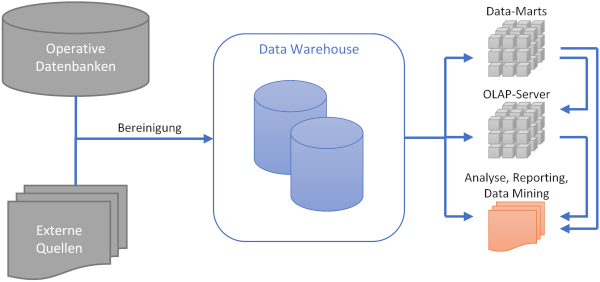

## Ergebnisdarstellung
**Fakten** sind Kennzahlen, die für ein Unternehmen von Interesse sind. Dazu können also Gewinn und Umsatz, in detaillierterer Betrachtung aber auch die Anzahl der Nutzer oder die Menge der Interaktionen zählen.

**Dimensionen** dienen als eine Kategorierisung der Fakten. Zu diesen zählt beispielsweise ein Zeitpunkt, der Standort einer Filiale oder die Gruppenzugehörigkeit in einem Split-Test. Dimensionen ermöglichen somit Filter und Gruppierung.

Das Ergebnis der Verknüpfung aus Dimensionen und Fakten lässt sich als Würfel oder Quader visualisieren. Im Folgenden soll dies am Datensatz [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales) demonstriert werden. Als Dimensionen stehen das Genre, die Plattform und das Jahrzehnt bereit. Die meisten Angaben wurden durch Abkürzungen ersetzt, um die Darstellung zu vereinfachen. Als Fakt werden wir den Durchschnitt der Anzahl der verkauften Einheiten verwenden.

Laden Sie zuerst Pandas und den Datensatz.

In [ ]:
df = pd.read_csv(vgsales_path, index_col='rank')
df

Um die Präsentation als Würfel zu ermöglichen, wird die Funktion `groupby` mit allen Spalten genutzt. Als Fakt wird der Durchschnitt der verkauften Einheiten gewählt. Pandas stellt die entstehende Series mit mehreren Indizes in Form einer Tabelle dar.

In [ ]:
cube = df.groupby(['genre', 'platform', 'decade'])['sales'].mean().round(2)
cube

Diese Tabelle lässt sich in die grafische Darstellung überführen.

In [ ]:
draw_olap_cube(cube)

Natürlich sind auch mehr als drei Dimensionen möglich. In diesem Fall müssen Sie allerdings zuerst eine Reduktion vornehmen, sofern Sie das Ergebnis grafisch darstellen möchten.